In [1]:
! pip install sklearn_nature_inspired_algorithms==0.4.3
! pip install NiaPy
! pip install algorithms
! pip install scipy
! pip install pyswarm
! pip install pandas

  Obtaining dependency information for sklearn_nature_inspired_algorithms==0.4.3 from https://files.pythonhosted.org/packages/01/e1/29ad71e68b422f28e58f3ab9b9ef3e824c2c5192cb264fa9f25e91c3f663/sklearn_nature_inspired_algorithms-0.4.3-py3-none-any.whl.metadata
  Using cached sklearn_nature_inspired_algorithms-0.4.3-py3-none-any.whl.metadata (4.9 kB)
  Obtaining dependency information for NiaPy==2.0.0rc10 from https://files.pythonhosted.org/packages/21/cc/188600a551120c29480706565f3a526f81fc5ea13ed094b2cdabaff5388b/NiaPy-2.0.0rc10-py3-none-any.whl.metadata
  Using cached NiaPy-2.0.0rc10-py3-none-any.whl.metadata (8.4 kB)
  Obtaining dependency information for pandas<2.0.0,>=1.0.3 from https://files.pythonhosted.org/packages/da/6d/1235da14daddaa6e47f74ba0c255358f0ce7a6ee05da8bf8eb49161aa6b5/pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scikit-learn-0.22.2.post1.tar.gz (6.9 MB)
  Preparing metadata (set

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [55 lines of output]
  C:\Users\PC\AppData\Local\Temp\pip-install-2tnkg127\scikit-learn_d2535a6fd09d43d3bf58187c8f3a13f8\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import parse_version
  Partial import of sklearn during the build process.
  C:\Users\PC\AppData\Local\Temp\pip-install-2tnkg127\scikit-learn_d2535a6fd09d43d3bf58187c8f3a13f8\setup.py:123: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    f

In [2]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.optimize import minimize
import random

C:\Users\PC\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the datasets
rabi_data = pd.read_excel('up data rabi.xlsx')

# Display the first few rows of the datasets
print("Rabi Data Preview:")
print(rabi_data.head())

Rabi Data Preview:
               DIRECTORATE OF ECONOMICS & STATISTICS  \
0  ESTIMATES OF COST OF CULTIVATION/PRODUCTION \n...   
1                               STATE: UTTAR PRADESH   
2                                              Sl no   
3                                              I-1.1   
4                                                1.2   

                                    Unnamed: 1     Unnamed: 2 Unnamed: 3  \
0                                          NaN            NaN        NaN   
1                                          NaN  YEAR: 2020-21        NaN   
2  Items                     Crops(Rabi crops)            NaN      Wheat   
3            Cost of Cultivation (Rs./Hectare)             A1   36766.93   
4                                          NaN             A2   36948.16   

  Unnamed: 4 Unnamed: 5                   Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN                          NaN        NaN        NaN   
1        NaN        NaN        

In [5]:
rabi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   DIRECTORATE OF ECONOMICS & STATISTICS  75 non-null     object
 1   Unnamed: 1                             58 non-null     object
 2   Unnamed: 2                             22 non-null     object
 3   Unnamed: 3                             69 non-null     object
 4   Unnamed: 4                             69 non-null     object
 5   Unnamed: 5                             69 non-null     object
 6   Unnamed: 6                             69 non-null     object
 7   Unnamed: 7                             69 non-null     object
 8   Unnamed: 8                             69 non-null     object
 9   Unnamed: 9                             3 non-null      object
dtypes: object(10)
memory usage: 6.0+ KB


In [6]:
rabi_data.head()

,DIRECTORATE OF ECONOMICS & STATISTICS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ESTIMATES OF COST OF CULTIVATION/PRODUCTION \n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE: UTTAR PRADESH,NaN,YEAR: 2020-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sl no,Items Crops(Rabi crops),NaN,Wheat,Barley,Gram,R & M (Rapseed and Mustard),Lentil,Potato,Total
3,I-1.1,Cost of Cultivation (Rs./Hectare),A1,36766.93,30627.05,18944.12,24610.56,15960.58,98917.02,NaN
4,1.2,NaN,A2,36948.16,30627.05,18958.55,25313.63,16574.34,98940.65,NaN


In [7]:
# Corrected water requirements for each crop (in m3)
Wri = np.array([5500, 3500, 3500, 2500, 3000, 6000])

# Total available water (Wt)
Wt = 68200000000  # Total available water in m3

# Total available area for cultivation (At)
At = 16.81  # Total area in million hectares

# Corrected allocated areas for each crop (Ai)
Ai = np.array([9.8, 0.16, 0.36, 0.65, 0.25, 0.61])  # Allocated area in million hectares

# Define the lower and upper bounds for area allocations (lbi and Ubi)
lbi = np.array([9.7, 0.15, 0.35, 0.62, 0.22, 0.6])  # Lower bounds for each crop
Ubi = np.array([10.0, 0.17, 0.38, 0.7, 0.26, 0.65])  # Upper bounds for each crop

# Calculate the total water usage (∑(Wri*Ai))
total_water_usage = np.sum(Wri * Ai * 1e6)  # Convert million hectares to hectares for calculation

# Check if the water availability constraint is satisfied
water_constraint_satisfied = total_water_usage <= Wt

# Calculate the sum of the allocated areas (∑ Ai)
total_allocated_area = np.sum(Ai)

# Check if the constraint regarding total available area for cultivation is satisfied
area_constraint_satisfied = total_allocated_area <= At

# Check if the allocated areas are non-negative and within the specified bounds
bounds_constraint_satisfied = np.all(np.logical_and(lbi <= Ai, Ai <= Ubi))

# Print the results of constraint satisfaction
print("Water Constraint Satisfied:", water_constraint_satisfied)
print("Area Constraint Satisfied:", area_constraint_satisfied)
print("Bounds Constraint Satisfied:", bounds_constraint_satisfied)


Water Constraint Satisfied: True
Area Constraint Satisfied: True
Bounds Constraint Satisfied: True


In [8]:
pip install pulp

In [9]:
# Define the values for each crop
crop_values = {
    "Wheat": (38.27, 21.39, 9.8, 9.21),
    "Barley": (34.52, 22.83, 0.16, 10.62),
    "Gram": (10.28, 58.05, 0.36, 31.89),
    "R & M (Rapseed and Mustard)": (16.24, 53.17, 0.65, 17.22),
    "Lentil": (11.40, 58.23, 0.25, 19.82),
    "Potato": (206.66, 8.22, 0.61, 4.87)
}

# Initialize total objective function value
total_objective_value = 0

# Calculate the objective function value for each crop and print
print("Crop\t\tObjective Function Value (Rs)")
print("------------------------------------------")
for crop, values in crop_values.items():
    yi, pi, ai, ci = values
    crop_objective_value = (yi * pi * ai) - (ci * ai)
    print(f"{crop.ljust(30)}\t{round(crop_objective_value, 2)}")
    total_objective_value += crop_objective_value

# Print the total objective function value
print("------------------------------------------")
print(f"Total\t\t\t\t{round(total_objective_value, 2)} Rs")


Crop		Objective Function Value (Rs)
------------------------------------------
Wheat                         	7931.98
Barley                        	124.4
Gram                          	203.35
R & M (Rapseed and Mustard)   	550.07
Lentil                        	161.0
Potato                        	1033.26
------------------------------------------
Total				10004.06 Rs


# Genetic Algorithm Code

In [20]:
import time
# Set random seed for reproducibility
random.seed(42)
# Genetic Algorithm parameters
population_size = 70
generations = 500
mutation_rate = 0.1

# Function to calculate crop objective value
def calculate_crop_objective_value(allocation):
    total_objective_value = 0
    for crop, values in crop_values.items():
        yi, pi, ai, ci = values
        crop_objective_value = (yi * pi * ai * allocation[crop]) - (ci * ai * allocation[crop])
        total_objective_value += crop_objective_value
    return total_objective_value

# Record the start time
start_time = time.time()

# Initialize population with random allocations
population = []
for _ in range(population_size):
    allocation = {crop: random.uniform(0, 1) for crop in crop_values.keys()}
    population.append(allocation)

# Genetic Algorithm
for _ in range(generations):
    # Evaluate fitness of each individual in the population
    fitness_scores = [calculate_crop_objective_value(individual) for individual in population]

    # Select parents for crossover (tournament selection)
    selected_parents = []
    for _ in range(2):
        tournament = random.sample(range(population_size), k=5)
        selected_parent = max(tournament, key=lambda x: fitness_scores[x])
        selected_parents.append(population[selected_parent])

    # Crossover (uniform crossover)
    child1, child2 = {}, {}
    for crop in crop_values.keys():
        if random.random() < 0.5:
            child1[crop] = selected_parents[0][crop]
            child2[crop] = selected_parents[1][crop]
        else:
            child1[crop] = selected_parents[1][crop]
            child2[crop] = selected_parents[0][crop]

    # Mutation
    if random.random() < mutation_rate:
        mutated_child = random.choice([child1, child2])
        mutated_crop = random.choice(list(crop_values.keys()))
        mutated_child[mutated_crop] = random.uniform(0, 1)

    # Replace parents with children
    population.extend([child1, child2])

    # Remove least fit individuals
    population = sorted(population, key=lambda x: calculate_crop_objective_value(x), reverse=True)[:population_size]

# Get the best individual and its objective value
best_individual = max(population, key=lambda x: calculate_crop_objective_value(x))
best_objective_value = calculate_crop_objective_value(best_individual)

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Calculate the objective function value for each crop in the best allocation
crop_objective_values = {}
for crop, values in crop_values.items():
    yi, pi, ai, ci = values
    crop_objective_values[crop] = (yi * pi * ai * best_individual[crop]) - (ci * ai * best_individual[crop])

# Print objective function value of each crop
print("Objective Function Value of Each Crop:")
print("--------------------------------------")
for crop, obj_value in crop_objective_values.items():
    print(f"{crop.ljust(25)}: {obj_value:.2f}")

# Print total objective function value
print("\nTotal Objective Function Value of GA:")
print("--------------------------------------")
print(f"Total: {best_objective_value:.2f}")

# Print execution time
print("\nExecution Time:", execution_time, "seconds")


Objective Function Value of Each Crop:
--------------------------------------
Wheat                    : 7926.28
Barley                   : 120.95
Gram                     : 197.47
R & M (Rapseed and Mustard): 509.57
Lentil                   : 136.64
Potato                   : 1019.46

Total Objective Function Value of GA:
--------------------------------------
Total: 9910.37

Execution Time: 0.10027194023132324 seconds


# Differential Evolution Code

In [11]:
# Set random seed for reproducibility
random.seed(42)
# DE parameters
population_size = 70
generations = 500
mutation_rate = 0.5
crossover_rate = 0.7
bounds = [(0, 1)] * len(crop_values)

# Objective function
def objective_function(allocation):
    total_objective_value = 0
    for crop, values in crop_values.items():
        yi, pi, ai, ci = values
        crop_objective_value = (yi * pi * ai * allocation[crop]) - (ci * ai * allocation[crop])
        total_objective_value += crop_objective_value
    return total_objective_value

# Differential Evolution Algorithm
def differential_evolution(population_size, bounds, generations, mutation_rate, crossover_rate):
    population = [({crop: random.uniform(0, 1) for crop in crop_values.keys()}, objective_function({crop: random.uniform(0, 1) for crop in crop_values.keys()})) for _ in range(population_size)]

    for gen in range(generations):
        for i in range(population_size):
            target_vector, target_fitness = population[i]
            indices = [idx for idx in range(population_size) if idx != i]
            a, b, c = random.choices(population=population, k=3)
            donor_vector = {crop: np.clip(a[0][crop] + mutation_rate * (b[0][crop] - c[0][crop]), 0, 1) for crop in crop_values.keys()}

            j_rand = np.random.randint(len(bounds))
            crossover_points = [random.random() < crossover_rate for _ in range(len(bounds))]
            trial_vector = {crop: donor_vector[crop] if crossover_points[idx] else target_vector[crop] for idx, crop in enumerate(crop_values.keys())}

            trial_fitness = objective_function(trial_vector)
            if trial_fitness > target_fitness:
                population[i] = (trial_vector, trial_fitness)

    best_solution, best_fitness = max(population, key=lambda x: x[1])
    return best_solution, best_fitness


# Record the start time
start_time = time.time()

# Run DE algorithm
best_solution, best_objective_value = differential_evolution(population_size, bounds, generations, mutation_rate, crossover_rate)

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Calculate the objective function value for each crop in the best individual
crop_objective_values = {crop: (crop_values[crop][0] * crop_values[crop][1] * crop_values[crop][2] * best_solution[crop]) - 
                          (crop_values[crop][3] * crop_values[crop][2] * best_solution[crop]) for crop in crop_values}

# Calculate the total objective function value
total_objective_value = sum(crop_objective_values.values())

# Print objective function value of each crop
print("Crop\t\tObjective Function Value of DE(Rs)")
print("--------------------------------------")
for crop, obj_value in crop_objective_values.items():
    print(f"{crop.ljust(25)}: {obj_value:.2f}")

# Print total objective function value
print("\nTotal Objective Function Value of DE:")
print("--------------------------------------")
print(f"Total: {total_objective_value:.2f}")

# Print execution time
print("\nExecution Time:", execution_time, "seconds")


Crop		Objective Function Value of DE(Rs)
--------------------------------------
Wheat                    : 7931.98
Barley                   : 124.40
Gram                     : 203.35
R & M (Rapseed and Mustard): 550.07
Lentil                   : 161.00
Potato                   : 1033.26

Total Objective Function Value of DE:
--------------------------------------
Total: 10004.06

Execution Time: 1.6902985572814941 seconds


# Particle Swarm Optimization Code

In [27]:
import time
# Set random seed for reproducibility
random.seed(42)
num_particles = 70
num_dimensions = len(crop_values)
max_iter = 500
c1 = 2
c2 = 2
w = 0.7
bounds = [(0, 1)] * num_dimensions

# Objective function
def objective_function(allocation):
    total_objective_value = 0
    for crop, values in crop_values.items():
        yi, pi, ai, ci = values
        crop_objective_value = (yi * pi * ai * allocation[crop]) - (ci * ai * allocation[crop])
        total_objective_value += crop_objective_value
    return total_objective_value

# PSO function
def pso(num_particles, num_dimensions, max_iter, c1, c2, w, bounds):
    particles = np.random.uniform(0, 1, (num_particles, num_dimensions))
    velocities = np.zeros((num_particles, num_dimensions))
    personal_best_positions = particles.copy()
    personal_best_scores = [objective_function({crop: particles[i][j] for j, crop in enumerate(crop_values)}) for i in range(num_particles)]
    global_best_index = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_index].copy()
    global_best_score = personal_best_scores[global_best_index]

    for iteration in range(max_iter):
        for i in range(num_particles):
            velocities[i] = w * velocities[i] + c1 * random.random() * (personal_best_positions[i] - particles[i]) + \
                             c2 * random.random() * (global_best_position - particles[i])
            particles[i] = np.clip(particles[i] + velocities[i], 0, 1)

            particle_score = objective_function({crop: particles[i][j] for j, crop in enumerate(crop_values)})
            if particle_score > personal_best_scores[i]:
                personal_best_scores[i] = particle_score
                personal_best_positions[i] = particles[i].copy()

                if personal_best_scores[i] > global_best_score:
                    global_best_position = personal_best_positions[i].copy()
                    global_best_score = personal_best_scores[i]

    best_allocation = {crop: global_best_position[j] for j, crop in enumerate(crop_values)}
    return best_allocation, global_best_score

# Timing and running PSO
start_time = time.time()
best_allocation, best_objective_value = pso(num_particles, num_dimensions, max_iter, c1, c2, w, bounds)
end_time = time.time()

execution_time = end_time - start_time

# Calculating objective function value for each crop in the best allocation
crop_objective_values = {crop: (crop_values[crop][0] * crop_values[crop][1] * crop_values[crop][2] * best_allocation[crop]) -
                            (crop_values[crop][3] * crop_values[crop][2] * best_allocation[crop]) for crop in crop_values}

# Printing results
print("\nTotal Objective Function Value of PSO:")
print("--------------------------------------")
for crop, obj_value in crop_objective_values.items():
    print(f"{crop.ljust(30)}: {obj_value:.2f}")

print("\nTotal Objective Function Value of PSO:")
print("--------------------------------------")
print(f"Total: {best_objective_value:.2f}")

print("\nExecution Time:", execution_time, "seconds")



Total Objective Function Value of PSO:
--------------------------------------
Wheat                         : 7931.98
Barley                        : 0.00
Gram                          : 203.35
R & M (Rapseed and Mustard)   : 550.07
Lentil                        : 161.00
Potato                        : 1033.26

Total Objective Function Value of PSO:
--------------------------------------
Total: 9879.66

Execution Time: 0.4639737606048584 seconds


# Evolutionary Programming Code

In [13]:
# Set random seed for reproducibility
random.seed(30)
# EP parameters
population_size = 70
num_generations = 500
mutation_rate = 0.1
mutation_step = 0.1
num_dimensions = len(crop_values)
bounds = [(0, 1)] * num_dimensions

# Objective function
def objective_function(allocation):
    total_objective_value = 0
    for crop, values in crop_values.items():
        yi, pi, ai, ci = values
        crop_objective_value = (yi * pi * ai * allocation[crop]) - (ci * ai * allocation[crop])
        total_objective_value += crop_objective_value
    return total_objective_value

# Evolutionary Programming algorithm
def evolutionary_programming(population_size, num_generations, mutation_rate, mutation_step, bounds):
    population = [{crop: random.uniform(0, 1) for crop in crop_values.keys()} for _ in range(population_size)]

    for generation in range(num_generations):
        offspring = []
        for parent in population:
            mutated_child = {}
            for crop, value in parent.items():
                if random.random() < mutation_rate:
                    mutation_direction = random.uniform(-1, 1)
                    mutated_value = value + mutation_step * mutation_direction
                    mutated_value = max(min(mutated_value, 1), 0)  # Clip values to [0, 1]
                    mutated_child[crop] = mutated_value
                else:
                    mutated_child[crop] = value
            offspring.append(mutated_child)
        population = offspring

    best_individual = max(population, key=objective_function)
    best_objective_value = objective_function(best_individual)
    return best_individual, best_objective_value

# Record the start time
start_time = time.time()

# Run EP algorithm
best_allocation, best_objective_value = evolutionary_programming(population_size, num_generations, mutation_rate, mutation_step, bounds)

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Calculate the objective function value for each crop in the best allocation
crop_objective_values = {crop: (crop_values[crop][0] * crop_values[crop][1] * crop_values[crop][2] * best_allocation[crop]) -
                              (crop_values[crop][3] * crop_values[crop][2] * best_allocation[crop]) for crop in crop_values}

# Print objective function value of each crop
print("\nTotal Objective Function Value of EP:")
print("--------------------------------------")
for crop, obj_value in crop_objective_values.items():
    print(f"{crop.ljust(30)}: {obj_value:.2f}")

# Print total objective function value
print("\nTotal Objective Function Value of EP:")
print("--------------------------------------")
print(f"Total: {best_objective_value:.2f}")

# Print execution time
print("\nExecution Time:", execution_time, "seconds")



Total Objective Function Value of EP:
--------------------------------------
Wheat                         : 7931.98
Barley                        : 92.38
Gram                          : 107.68
R & M (Rapseed and Mustard)   : 194.50
Lentil                        : 28.00
Potato                        : 1033.26

Total Objective Function Value of EP:
--------------------------------------
Total: 9387.80

Execution Time: 0.041765689849853516 seconds


# Comparison

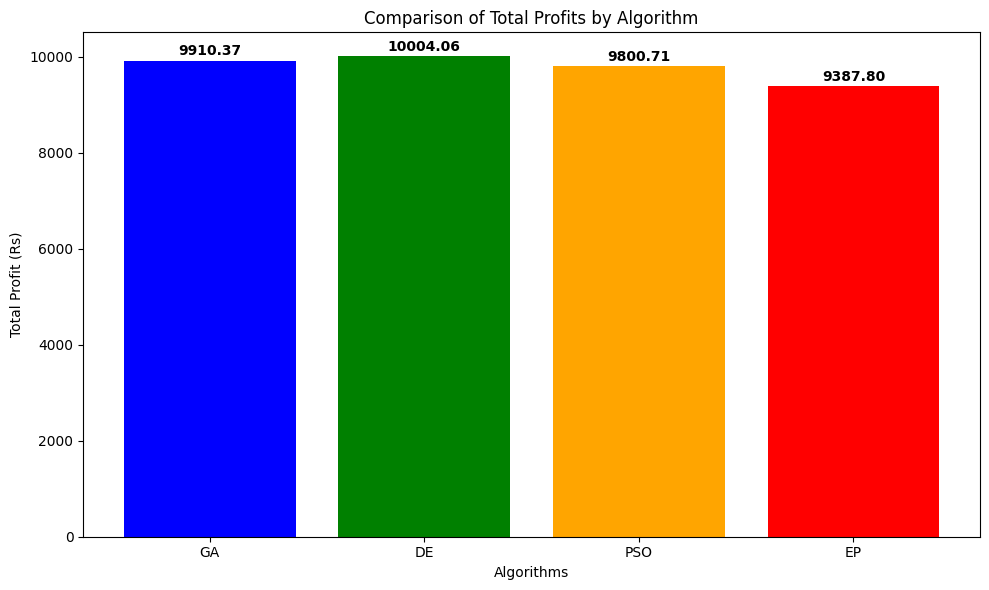

In [14]:
# Data for the algorithms
algorithms = ['GA', 'DE', 'PSO', 'EP']
total_profits = [9910.37, 10004.06, 9800.71, 9387.80]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, total_profits, color=['blue', 'green', 'orange', 'red'])

# Adding the total profit values on top of the bars with bold text
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{round(yval, 2):.2f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')  # Bold fontweight added here

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Total Profit (Rs)')
plt.title('Comparison of Total Profits by Algorithm')

# Display the plot
plt.tight_layout()
plt.show()


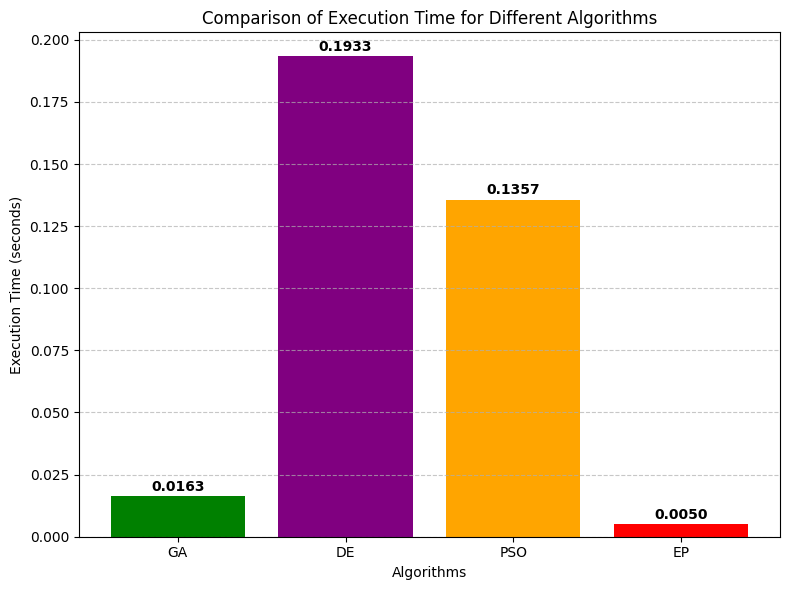

In [15]:
# Data for execution time of each algorithm
algorithms = ['GA', 'DE', 'PSO', 'EP']
execution_times = [0.016266584396362305, 0.19333124160766602, 0.13570046424865723, 0.005026102066040039]

plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, execution_times, color=['green', 'purple', 'orange', 'red'])

# Adding labels on top of the bars
for bar, time in zip(bars, execution_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{time:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time for Different Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


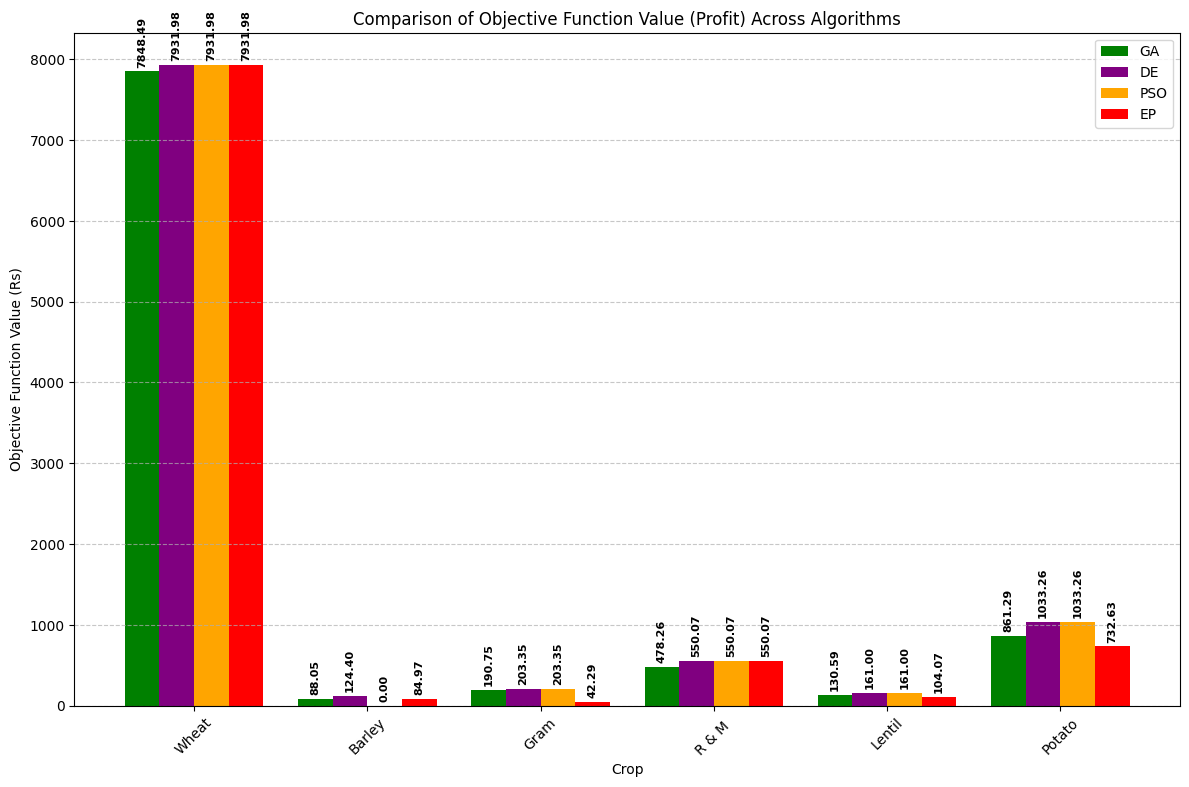

In [16]:
# Data for profit of each crop and total profit for each algorithm
algorithms = ['GA', 'DE', 'PSO', 'EP']
crop_names = ["Wheat", "Barley", "Gram", "R & M ", "Lentil", "Potato"]
objective_values_GA = [7848.49, 88.05, 190.75, 478.26, 130.59, 861.29]
objective_values_DE = [7931.98, 124.4, 203.35, 550.07, 161.0, 1033.26]
objective_values_PSO = [7931.98, 0.0, 203.35, 550.07, 161.0, 1033.26]
objective_values_EP = [7931.98, 84.97, 42.29, 550.07, 104.07, 732.63]

# Plotting
bar_width = 0.2
index = range(len(crop_names))

plt.figure(figsize=(12, 8))

# Plotting bars for each algorithm
bar2 = plt.bar([i - 1.5 * bar_width for i in index], objective_values_GA, bar_width, label='GA', color='green')
bar3 = plt.bar([i - 0.5 * bar_width for i in index], objective_values_DE, bar_width, label='DE', color='purple')
bar4 = plt.bar([i + 0.5 * bar_width for i in index], objective_values_PSO, bar_width, label='PSO', color='orange')
bar5 = plt.bar([i + 1.5 * bar_width for i in index], objective_values_EP, bar_width, label='EP', color='red')

# Adding labels vertically above each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', rotation=90, fontsize=8, fontweight='bold')

# Call autolabel function for each set of bars
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)

plt.xlabel('Crop')
plt.ylabel('Objective Function Value (Rs)')
plt.title('Comparison of Objective Function Value (Profit) Across Algorithms')
plt.xticks(index, crop_names, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
